<a href="https://colab.research.google.com/github/dutta-arka/Transit-Detect/blob/main/Vetting/TIC_92352621_Vetting_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install triceratops

In [ ]:
!pip install lightkurve

In [3]:
import numpy as np
import pandas as pd
import time
import lightkurve as lk
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
# .csv file is directly from SHERLOCKPIPE out product
# lc_0.csv is made for slected sectors or specifically made for this one
data = pd.read_csv("lc_1.csv")

# Extract the values from each column
x = data.iloc[:, 0]
y = data.iloc[:, 1]
error = data.iloc[:, 2]

# LightCurve object
lc = lk.LightCurve(time=x, flux=y, flux_err=error)#.bin(time_bin_size=0.007)
lc = lc.remove_nans()

# Perform phase folding around the given epoch
tic_id = 92352621
period = 3.95049  # Orbital period in days
epoch = 1328.3653
folded_lc = lc.fold(period=period, epoch_time=epoch)
folded_lc = folded_lc[folded_lc.time < 0.15]
folded_lc = folded_lc[folded_lc.time > -0.35]

# Plot the data with error bars
# plt.errorbar(x, y, fmt='o', markersize=3, capsize=2)

# # Plot a dotted line connecting the y-values
# plt.plot(x, y, linestyle=':', color='black')

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Folded light curve')
# plt.gcf().set_size_inches(15, 8)
# plt.grid(True)
# plt.show()

# Create a DataFrame with the required columns
folded_data = pd.DataFrame({
    'Time': folded_lc.time.value,  # Convert time to array
    'Flux': folded_lc.flux.value,  # Convert flux to array
    'Flux Error': folded_lc.flux_err.value  # Convert flux error to array
})

# Save the phase-folded light curve to a CSV file without column headers
output_filename = f"TIC_{tic_id}_all_sector_lightcurve.csv"
folded_data.to_csv(output_filename, index=False, header=False)

print(f"Phase-folded light curve saved to: {output_filename}")

Phase-folded light curve saved to: TIC_92352621_all_sector_lightcurve.csv


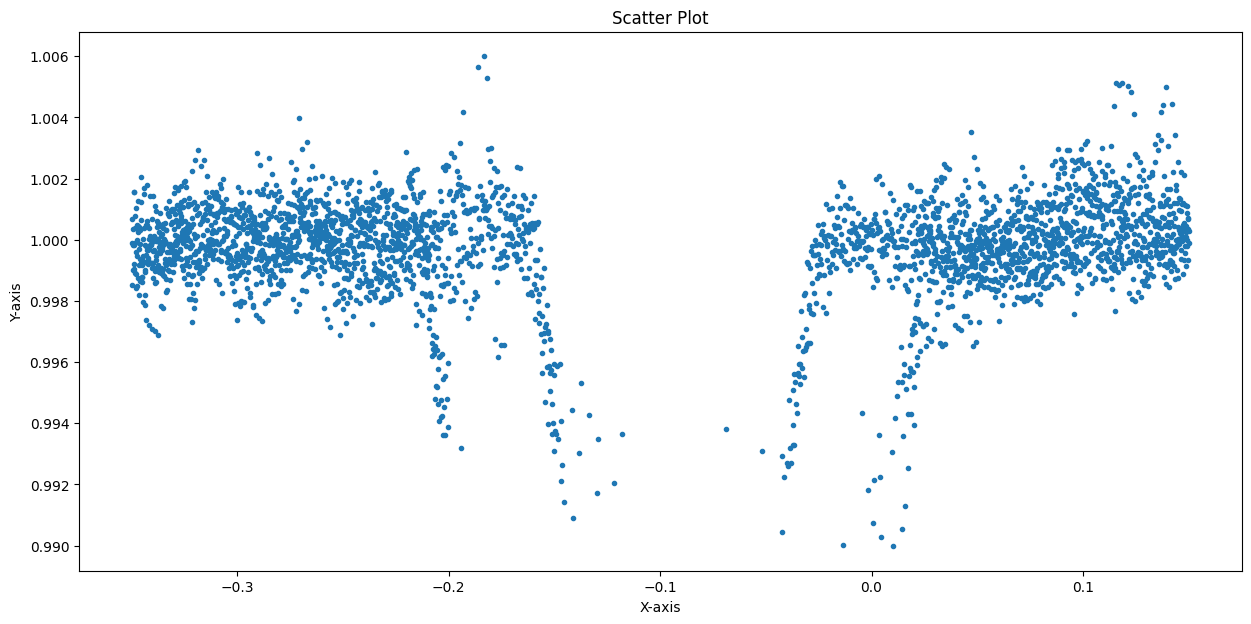

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv(f'TIC_{tic_id}_all_sector_lightcurve.csv')

# Extract the x and y values from the dataset
x = data.iloc[:, 0]  # Assuming the first column is the x-axis
y = data.iloc[:, 1]  # Assuming the second column is the y-axis

# Set the figure size
plt.figure(figsize=(15, 7))

# Create a scatter plot
plt.scatter(x, y, marker='.')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

# Show the plot
plt.show()

In [10]:
ID = tic_id
sectors = np.array([1, 27])
target = tr.target(ID=ID, sectors=sectors, search_radius=8) # target radius shorted

<ipython-input-11-45224da6b8d7>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  apertures = np.array([ap_1, ap_27])


Sector 1


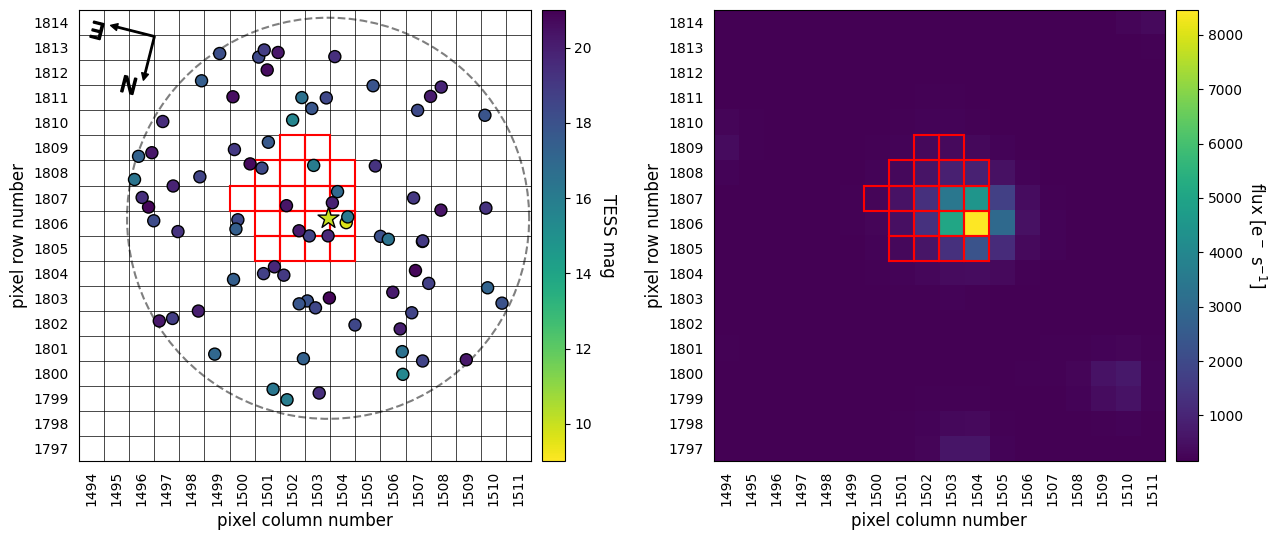

Sector 27


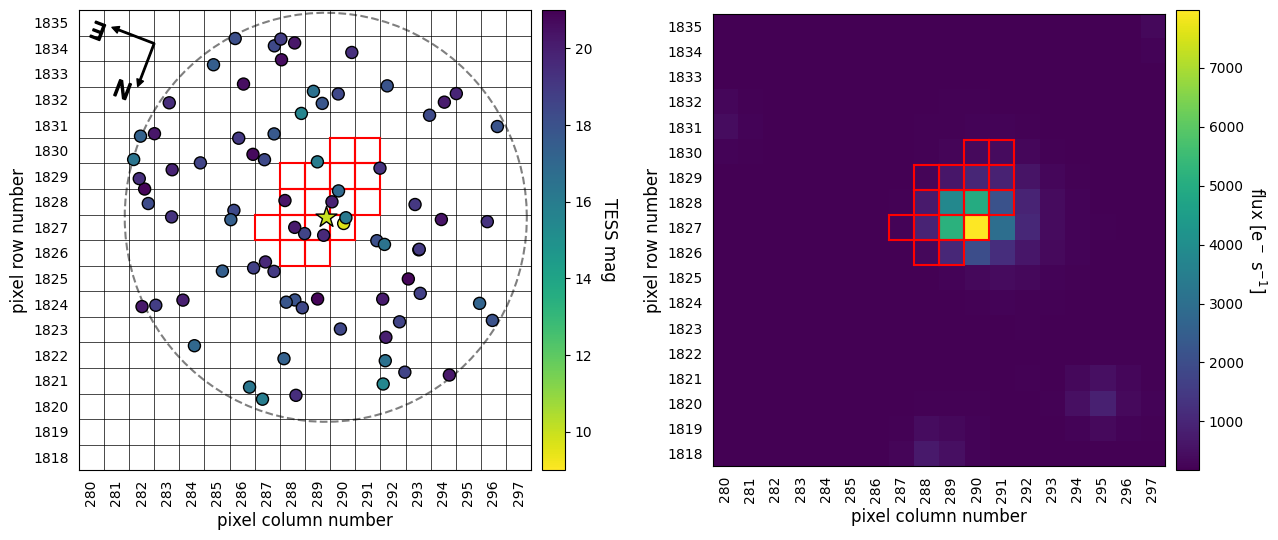

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,92352621,10.0103,9.498,9.266,9.188,313.788158,-34.135532,1.13,1.431290,6049.7,4.763480,0.000,0.000
1,1992089830,19.9082,NaN,NaN,NaN,313.788065,-34.139236,NaN,NaN,NaN,0.630647,13.337,181.192
2,1992089833,19.5942,NaN,NaN,NaN,313.786994,-34.131595,NaN,NaN,NaN,2.632610,14.591,346.244
3,92352620,9.6433,9.159,8.916,8.874,313.783102,-34.135558,1.14,1.710360,6072.6,4.706760,15.065,269.647
4,92350890,16.1250,15.625,10.830,10.570,313.783082,-34.136925,NaN,NaN,NaN,NaN,15.934,251.655
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,92352622,16.3999,15.551,15.063,14.822,313.841586,-34.133421,0.87,0.588871,5145.0,0.815171,159.388,87.283
75,92352618,17.2539,15.977,15.071,15.068,313.842068,-34.138834,0.62,0.641076,3954.0,0.970133,161.074,94.247
76,1992089866,20.2068,NaN,NaN,NaN,313.742465,-34.111551,NaN,NaN,NaN,-0.485333,161.232,302.361
77,1992090096,20.2201,NaN,NaN,NaN,313.825667,-34.103163,NaN,NaN,NaN,2.631940,161.480,43.821


In [11]:
ap_1 = np.array([[1500.0, 1807.0], [1501.0, 1805.0], [1501.0, 1806.0], [1501.0, 1807.0],
      [1501.0, 1808.0], [1502.0, 1805.0], [1502.0, 1806.0], [1502.0, 1807.0], [1502.0,
        1808.0], [1502.0, 1809.0], [1503.0, 1805.0], [1503.0, 1806.0], [1503.0, 1807.0],
      [1503.0, 1808.0], [1503.0, 1809.0], [1504.0, 1805.0], [1504.0, 1806.0], [1504.0,
        1807.0], [1504.0, 1808.0]])
ap_27 = np.array([[287.0, 1827.0], [288.0, 1826.0], [288.0,
        1827.0], [288.0, 1828.0], [288.0, 1829.0], [289.0, 1826.0], [289.0, 1827.0],
      [289.0, 1828.0], [289.0, 1829.0], [290.0, 1827.0], [290.0, 1828.0], [290.0,
        1829.0], [290.0, 1830.0], [291.0, 1828.0], [291.0, 1829.0], [291.0, 1830.0]])

apertures = np.array([ap_1, ap_27])

for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

In [12]:
tdepth = 1.266 / 1000
target.calc_depths(tdepth=tdepth, all_ap_pixels=apertures)
target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,92352621,10.0103,9.498,9.266,9.188,313.788158,-34.135532,1.13,1.431290,6049.7,4.763480,0.000,0.000,4.840961e-01,0.002615
1,1992089830,19.9082,NaN,NaN,NaN,313.788065,-34.139236,NaN,NaN,NaN,0.630647,13.337,181.192,5.306921e-05,0.000000
2,1992089833,19.5942,NaN,NaN,NaN,313.786994,-34.131595,NaN,NaN,NaN,2.632610,14.591,346.244,6.329594e-05,0.000000
3,92352620,9.6433,9.159,8.916,8.874,313.783102,-34.135558,1.14,1.710360,6072.6,4.706760,15.065,269.647,5.111861e-01,0.002477
4,92350890,16.1250,15.625,10.830,10.570,313.783082,-34.136925,NaN,NaN,NaN,NaN,15.934,251.655,1.321241e-03,0.958190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,92352622,16.3999,15.551,15.063,14.822,313.841586,-34.133421,0.87,0.588871,5145.0,0.815171,159.388,87.283,5.559350e-11,0.000000
75,92352618,17.2539,15.977,15.071,15.068,313.842068,-34.138834,0.62,0.641076,3954.0,0.970133,161.074,94.247,1.366445e-11,0.000000
76,1992089866,20.2068,NaN,NaN,NaN,313.742465,-34.111551,NaN,NaN,NaN,-0.485333,161.232,302.361,3.043545e-21,0.000000
77,1992090096,20.2201,NaN,NaN,NaN,313.825667,-34.103163,NaN,NaN,NaN,2.631940,161.480,43.821,3.131563e-15,0.000000


In [16]:
%%time

# read in the light curve
lc = pd.read_csv(f"TIC_{ID}_all_sector_lightcurve.csv", header=None)
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/120
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

target.calc_probs(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value), P_orb=P_orb,
                  parallel=True)

Calculating TP scenario probabilitiey for 92352621.
Calculating EB and EBx2P scenario probabilities for 92352621.
Calculating PTP scenario probability for 92352621.
Calculating PEB and PEBx2P scenario probabilities for 92352621.
Calculating STP scenario probability for 92352621.
Calculating SEB and SEBx2P scenario probabilities for 92352621.
Calculating DTP scenario probability for 92352621.
Calculating DEB and DEBx2P scenario probabilities for 92352621.
Calculating BTP scenario probability for 92352621.
Calculating BEB and BEBx2P scenario probabilities for 92352621.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 92352620.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 92350890.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 92352615.
CPU times: user 4min 48s, sys: 4.37 s, total: 4min 52s
Wall time: 3min 39s


In [17]:
df_results = target.probs
print("FPP =", np.round(target.FPP, 8))
print("NFPP =", np.round(target.NFPP, 8))
df_results

FPP = nan
NFPP = 0.0


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,92352621,TP,1.130000,1.431290,3.95049,79.138170,1.729376,2.795647e-01,304.187108,9.862206,0.000000,0.000000,NaN
1,92352621,EB,1.130000,1.431290,3.95049,68.591176,3.858208,3.724903e-01,304.325628,0.000000,0.416745,0.417038,NaN
2,92352621,EBx2P,1.130000,1.431290,7.90098,68.591176,6.124523,3.724903e-01,304.325628,0.000000,0.416745,0.417038,NaN
3,92352621,PTP,1.130000,1.431290,3.95049,70.718384,1.913133,2.491049e-01,73.603573,2.193764,0.000000,0.000000,NaN
4,92352621,PEB,1.130000,1.431290,3.95049,58.467994,2.740126,4.416818e-01,67.729838,0.000000,0.813891,0.840388,NaN
5,92352621,PEBx2P,1.130000,1.431290,7.90098,58.467994,4.349679,4.416818e-01,67.729838,0.000000,0.813891,0.840388,NaN
6,92352621,STP,0.444622,0.443147,3.95049,77.267949,3.714618,7.374204e-02,68.928800,2.752208,0.000000,0.000000,NaN
7,92352621,SEB,0.513215,0.518440,3.95049,63.056715,8.659001,5.812670e-02,241.846389,0.000000,0.208129,0.237384,NaN
8,92352621,SEBx2P,0.513215,0.518440,7.90098,63.056715,13.745308,5.812670e-02,241.846389,0.000000,0.208129,0.237384,NaN
9,92352621,DTP,1.130000,1.431290,3.95049,76.723750,1.928506,1.093259e-01,245.601719,4.879390,0.000000,0.000000,NaN


/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


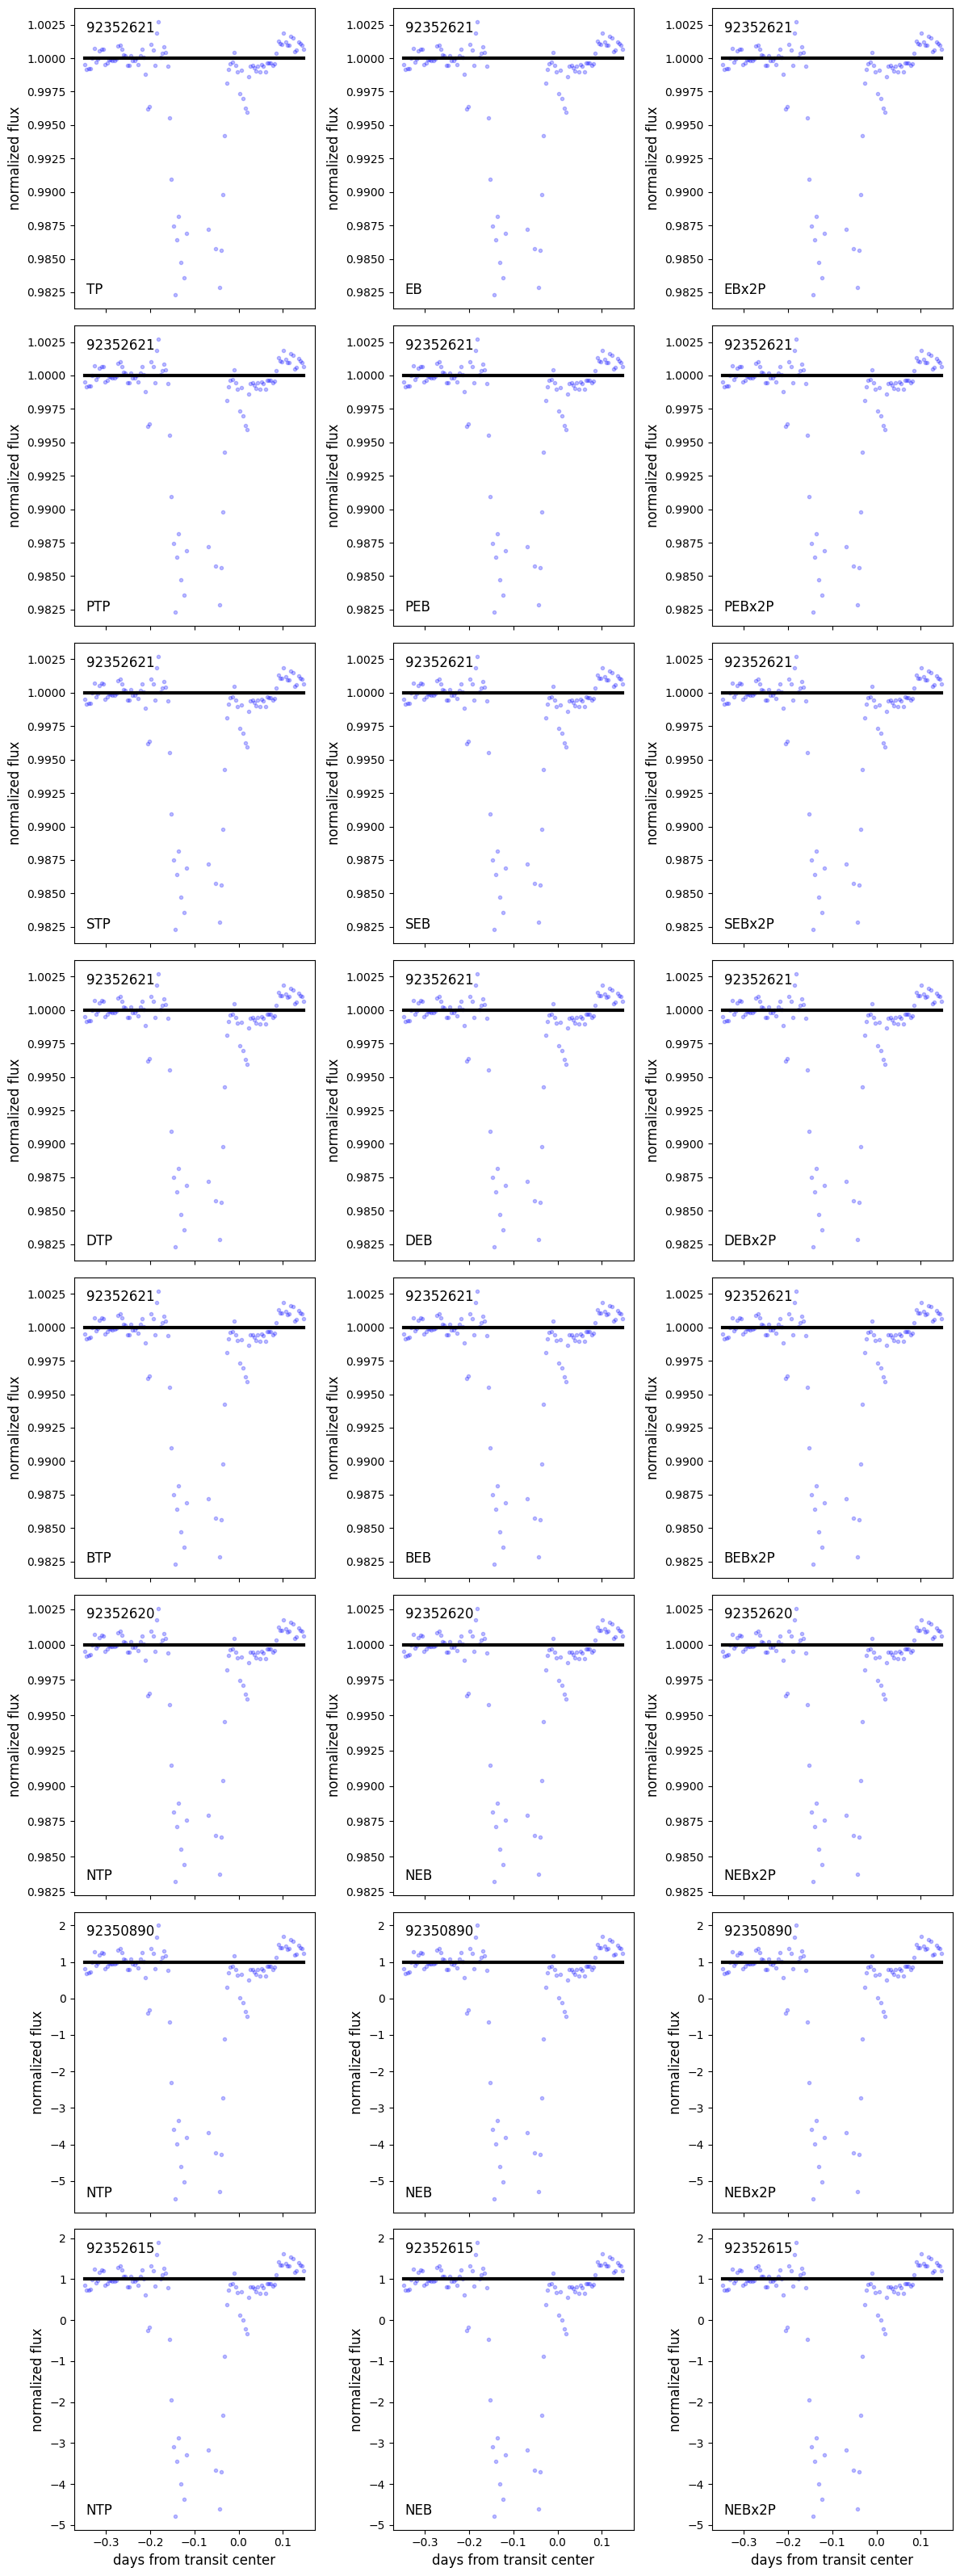

In [18]:
target.plot_fits(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value))

In [19]:
%%time
# Reduced repetition for nans
FPPs = np.zeros(5)
NFPPs = np.zeros(5)
for i in range(5):
    target.calc_probs(time=lc.time.value,
                      flux_0=lc.flux.value,
                      flux_err_0=np.mean(lc.flux_err.value),
                      P_orb=P_orb,
                      parallel=True,
                      verbose=0)
    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP

meanFPP = np.mean(FPPs)
stdvFPP = np.std(FPPs)
print("FPP =", meanFPP, "+/-", stdvFPP)

meanNFPP = np.mean(NFPPs)
stdvNFPP = np.std(NFPPs)
print("NFPP =", meanNFPP, "+/-", stdvNFPP)

FPP = nan +/- nan
NFPP = 0.0 +/- 0.0
CPU times: user 23min 59s, sys: 22.7 s, total: 24min 22s
Wall time: 16min 38s


Our final conclusion about this specified planet of TIC 92352621 is that it is an invalid transit (according to the range of FPP and NFPP set by TRICERATOPS).